# Lecture 06 - Performance metrics

***
##### CS 434 - Dating Mining and Machine Learning
##### Oregon State University-Cascades
***

## Load packages

In [0]:
import ssl
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, spearmanr
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ssl._create_default_https_context = ssl._create_unverified_context

# <img src="https://img.icons8.com/color/32/000000/accept-database.png"/> Prepare a dataset

#### [Breast Cancer Wisconsin dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [0]:
# read dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)
# class label is last
print(df)

           0  1      2      3   ...      28      29      30       31
0      842302  M  17.99  10.38  ...  0.7119  0.2654  0.4601  0.11890
1      842517  M  20.57  17.77  ...  0.2416  0.1860  0.2750  0.08902
2    84300903  M  19.69  21.25  ...  0.4504  0.2430  0.3613  0.08758
3    84348301  M  11.42  20.38  ...  0.6869  0.2575  0.6638  0.17300
4    84358402  M  20.29  14.34  ...  0.4000  0.1625  0.2364  0.07678
..        ... ..    ...    ...  ...     ...     ...     ...      ...
564    926424  M  21.56  22.39  ...  0.4107  0.2216  0.2060  0.07115
565    926682  M  20.13  28.25  ...  0.3215  0.1628  0.2572  0.06637
566    926954  M  16.60  28.08  ...  0.3403  0.1418  0.2218  0.07820
567    927241  M  20.60  29.33  ...  0.9387  0.2650  0.4087  0.12400
568     92751  B   7.76  24.54  ...  0.0000  0.0000  0.2871  0.07039

[569 rows x 32 columns]


In [0]:
# split into X and y
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

# split into train and tes
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

***
# <img src="https://img.icons8.com/color/32/000000/grid-2.png"/> Confusion matrix
***


A confusion matrix is a way to summarize the performance of a classifier for binary classification tasks. 

This square matrix consists of columns and rows that list the number of instances as absolute or relative `actual class` vs. `predicted class` ratios.


<img src=https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch06/images/06_08.png width="500">

* **True positive:** correctly predicted as *true*.
* **True negative:** correctly predicted as *false*.
* **False positive:** predicted as *true*, but it is *false*.   `Type I Error`
* **False negative:** predicted as *false*, but it is *true*. `Type II Error`

### <img src="https://img.icons8.com/color/32/000000/inspect-code.png"/> Interpreting the confusion matrix

![alt text](https://www.researchgate.net/profile/Enoch_Opanin_Gyamfi5/publication/319183193/figure/fig4/AS:668388829437953@1536367723057/Modified-Confusion-Matrix-Table-for-Accuracy-Prediction-of-24.ppm)

### <img src="https://img.icons8.com/color/32/000000/new-document.png"/>  Example

Remember that we previously encoded the class labels so that malignant examples are the "postive" class (1), and benign examples are the "negative" class (0):

##### Print a confusion matrix

In [0]:
# display a confusion matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


##### Display a confusion matrix

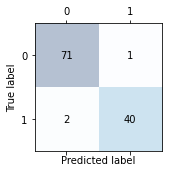

In [0]:
# graph a confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()


***
# <img src="https://img.icons8.com/color/32/000000/test-partial-passed.png"/>  Misclassification rate
***

### <img src="https://img.icons8.com/color/32/000000/cancel--v1.png"/> Error 
The error is the sum of all false predictions divided by the number of total predications.

\begin{equation} ERR = \frac{FP + FN}{FP+ FN + TP + TN} = 1-ACC\end{equation}

### <img src="https://img.icons8.com/color/32/000000/accuracy.png"/>  Accuracy

The accuracy is the sum of correct predictions divided by the total number of predictions.


\begin{equation} ACC = \frac{TP + TN}{FP+ FN + TP + TN} = 1-ERR\end{equation}

### <img src="https://img.icons8.com/color/32/000000/presentation.png"/>  Visualization

![alt text](https://herdingcats.typepad.com/.a/6a00d8341ca4d953ef017c35c54f99970b-pi)

***
# <img src="https://img.icons8.com/color/32/000000/true-false.png"/> True and false positives
***

True Positive Rate (TPR) and False Positive Rate (FPR) are performance
metrics that are especially useful for imbalanced class problems.

### True positive rate

\begin{equation} TPR = \frac{TP}{P} =  \frac{TP}{FN + TP} \end{equation}

### False positive rate
\begin{equation} FPR = \frac{FP}{N} =  \frac{FP}{FP + TN} \end{equation}

### TPP vs FPP
![alt text](https://i.imgur.com/uipmEwt.png)

***
# <img src="https://img.icons8.com/color/32/000000/search-property.png"/>  Information retrieval
***

### Precision

\begin{equation} PRE = \frac{TP}{TP + FP} \end{equation}

$$PRE={\frac {|\{{\text{relevant documents}}\} \  \cap \ \{{\text{retrieved documents}}\}|}{|\{{\text{retrieved documents}}\}|}}$$



### Recall

\begin{equation} REC = TPR = \frac{TP}{P} =  \frac{TP}{FN + TP} \end{equation}


 $$REC={\frac {|\{{\text{relevant documents}}\}\cap \{{\text{retrieved documents}}\}|}{|\{{\text{relevant documents}}\}|}}$$


### Precision vs recall

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/563px-Precisionrecall.svg.png)

### <img src="https://img.icons8.com/color/32/000000/f.png"/> $F_1$ score
The $F_1$ is the harmonic mean of precision and recall.



\begin{equation} F_1 = 2 \cdot \frac{PRE \cdot REC}{PRE + REC}\end{equation}

###Generalized $F_\beta$ score

The general formula for positive real β, where β is chosen such that recall is considered β times as important as precision.

$$F_\beta = (1 + \beta^2) \cdot \frac{PRE \cdot REC}{(\beta^2 \cdot PRE) + REC}$$


$$F_\beta = \frac {(1 + \beta^2) \cdot TP }{(1 + \beta^2) \cdot TP + \beta^2 \cdot FN + FP}$$


***
# <img src="https://img.icons8.com/color/32/000000/tape-measure.png"/> Sensitivity and specificity
***

### Sensitivity

Sensitivity measures the recovery rate of the *positives* and complimentary. 

\begin{equation} SEN = TPR = REC = \frac{TP}{P} =  \frac{TP}{FN + TP} \end{equation}

### Specificity

Specificity measures the recovery rate of the *negatives*.

\begin{equation} SPC = TNR =\frac{TN}{N} =  \frac{TN}{FP + TN} \end{equation}

### Sensitivity vs specificity

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Sensitivity_and_specificity.svg/563px-Sensitivity_and_specificity.svg.png)

# <img src="https://img.icons8.com/color/32/000000/formula-fx.png"/>  Matthews correlation coefficient

The Matthews correlation coefficient (MCC) is a specific case of a linear correlation coefficient (*Pearson* $r$) for a binary classification setting and is considered as especially useful in unbalanced class settings. 

The previous metrics take values in the range between 0 (worst) and 1 (best), whereas the MCC is bounded between the range 
* 1 (perfect correlation between ground truth and predicted outcome) and
* -1 (inverse or negative correlation) and 
* where a value of 0 indicates a random prediction.


\begin{equation} MCC = \frac{ TP \cdot TN - FP \cdot FN } {\sqrt{ (TP + FP) ( TP + FN ) ( TN + FP ) ( TN + FN ) } } \end{equation}


***
# <img src="https://img.icons8.com/color/32/000000/handshake.png"/> Inter-rater reliability
***

### <img src="https://img.icons8.com/color/32/000000/k.png"/> Kappa

Cohen's kappa $\kappa$ is the degree of agreement among raters. It is a score of how much homogeneity or consensus exists in the ratings given by various judges.

$$\kappa \equiv {\frac {p_{o}-p_{e}}{1-p_{e}}}=1-{\frac {1-p_{o}}{1-p_{e}}}$$

### <img src="https://img.icons8.com/color/32/000000/r.png"/> Correlation

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png)

#### <img src="https://img.icons8.com/color/32/000000/new-document.png"/>  Example

Generate 1,000 samples of two two variables with a strong positive correlation. The first variable will be random numbers drawn from a Gaussian distribution with a mean of 100 and a standard deviation of 20. The second variable will be values from the first variable with Gaussian noise added with a mean of a 50 and a standard deviation of 10.

data1: mean=100.776 stdv=19.620
data2: mean=151.050 stdv=22.358


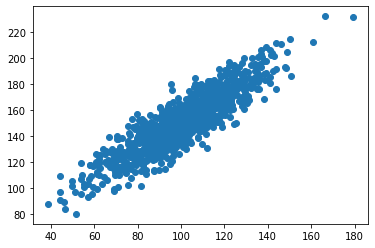

In [0]:
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 20 * randn(1000) + 100
data2 = data1 + (10 * randn(1000) + 50)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)
pyplot.show()

### <img src="https://img.icons8.com/color/32/000000/remote-working.png"/> Covariance
Covariance measure the relationship between two variables. The sign of the covariance can be interpreted as whether the two variables change in the same direction (positive) or change in different directions (negative). 


$$\operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}$$
 
where $\operatorname {E} [X]$ is the expected value of $X$ also known as the mean of $X$.

In [0]:
# calculate covariance matrix
covariance = np.cov(data1, data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


#### <img src="https://img.icons8.com/color/32/000000/p.png"/> Pearson's correlation

Pearson's correlation is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

$$\rho_{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma_{X}\sigma_{Y}}}$$

where:
* $\operatorname {cov}$  is the covariance
* $\sigma _{X}$ is the standard deviation of $X$
* $\sigma_Y$  is the standard deviation of $Y$

In [0]:
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.888


In [0]:
# calculate correlation matrix
coercoef = np.corrcoef(data1, data2)
print(coercoef)

[[1.         0.88761191]
 [0.88761191 1.        ]]


#### <img src="https://img.icons8.com/color/32/000000/s.png"/> Spearman's correlation
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

$$r_{s}=\rho _{\operatorname {rg} _{X},\operatorname {rg} _{Y}}={\frac {\operatorname {cov} (\operatorname {rg} _{X},\operatorname {rg} _{Y})}{\sigma _{\operatorname {rg} _{X}}\sigma _{\operatorname {rg} _{Y}}}}$$

where

* $\rho$  denotes the usual Pearson correlation coefficient, but applied to the rank variables,
* $\operatorname {cov}( \operatorname{rg}_{X},\operatorname {rg}_{Y})$ is the covariance of the rank variables,
* $\sigma _{\operatorname {rg} _{X}}$ and $\sigma _{\operatorname {rg} _{Y}}$ are the standard deviations of the rank variables.

In [0]:
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.872


***
# <img src="https://img.icons8.com/color/32/000000/graph.png"/> Receiver Operator Characteristic
***

Receiver Operator Characteristics (ROC) graphs are useful tools to select classification models based on their performance with respect to the *False Positive* and *True Positive* rates.

### <img src="https://img.icons8.com/color/32/000000/code.png"/>Example

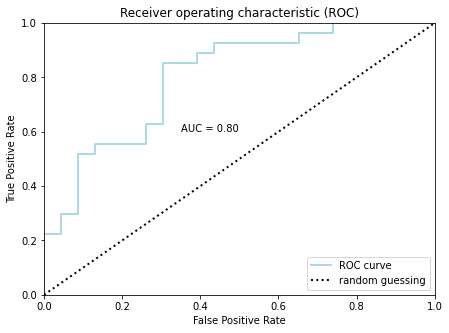

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

random_state = np.random.RandomState(0)

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=123)

# Run classifier
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)

plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='dotted', label='random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
ax.annotate('AUC = %0.2f' %roc_auc, xy=(0.35, 0.6))
plt.show()

The diagonal of a ROC graph can be interpreted as *random guessing* and
classification models that fall below the diagonal are considered as worse than
random guessing. A perfect classifier would fall into the top left corner of the
graph with a True Positive Rate of 1 and a False Positive Rate of 0.

### <img src="https://img.icons8.com/color/32/000000/area-chart.png"/> Area under the ROC curve

Based on the ROC curve, a metric known as the Area Under the Curve (AUC) can be calculated to characterize the performance of a classification model. 

# <img src="https://img.icons8.com/color/32/000000/new-document.png"/>  Metrics example

In [0]:
# demonstration of calculating metrics for a neural network model using sklearn

%tensorflow_version 2.x
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from keras.models import Sequential
from keras.layers import Dense

# generate and prepare the dataset
def get_data():
	# generate dataset
	X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
	# split into train and test
	n_test = 500
	trainX, testX = X[:n_test, :], X[n_test:, :]
	trainy, testy = y[:n_test], y[n_test:]
	return trainX, trainy, testX, testy

# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model

# generate data
trainX, trainy, testX, testy = get_data()
# fit model
model = get_model(trainX, trainy)


# predict probabilities for test set
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %.3f' % accuracy)
print('Error: %.3f' % (1.-accuracy))


# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes)
print('Precision: %.3f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes)
print('Recall: %.3f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes)
print('F1 score: %.3f' % f1)

# kappa
kappa = cohen_kappa_score(testy, yhat_classes)
print('Cohens kappa: %.3f' % kappa)

# correlation
pearson_r, _ = pearsonr(testy, yhat_classes)
print('Pearson\'s r: %.3f' % pearson_r)
spearman_r, _ = spearmanr(testy, yhat_classes)
print('Spearman\'s r: %.3f' % spearman_r)

# ROC AUC
auc = roc_auc_score(testy, yhat_probs)
print('ROC AUC: %.3f' % auc)

# confusion matrix\
print('Confusion matrix:')
matrix = confusion_matrix(testy, yhat_classes)
print(matrix)

# source: https://machinelearningmastery.com/how-to-calculate-precision-recall-f1-and-more-for-deep-learning-models/

Accuracy: 0.848
Error: 0.152
Precision: 0.849
Recall: 0.849
F1 score: 0.849
Cohens kappa: 0.696
Pearson's r: 0.696
Spearman's r: 0.696
ROC AUC: 0.923
Confusion matrix:
[[210  38]
 [ 38 214]]


***
# <img src="https://img.icons8.com/color/32/000000/chat.png"/> Discussion
***

1. Why is accuracy does not always give a clear picture of performance?
1. When is accuracy the most reliable?
1. Which is worse? 
  * misdiagnosing a healthy person as having `COVID 19`
  * misdiagnosing a person infected with `COVID 19` as healthy
1. Which value of the AU-ROC indicates random guessing?